# Customer Transaction Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Loading the Csv files

In [3]:
df = pd.read_csv("/Users/cars24/Desktop/uber_mlops_task/santander-customer-transaction-prediction/train.csv")
df_test = pd.read_csv("/Users/cars24/Desktop/uber_mlops_task/santander-customer-transaction-prediction/test.csv")

In [4]:
df.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
# df_test

## Data Preprocessing

In [22]:
X = df.iloc[:,1:]
# y = df.iloc[:,1]

In [23]:
X.shape

(200000, 201)

In [24]:
#No duplicates
X[X.duplicated]

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199


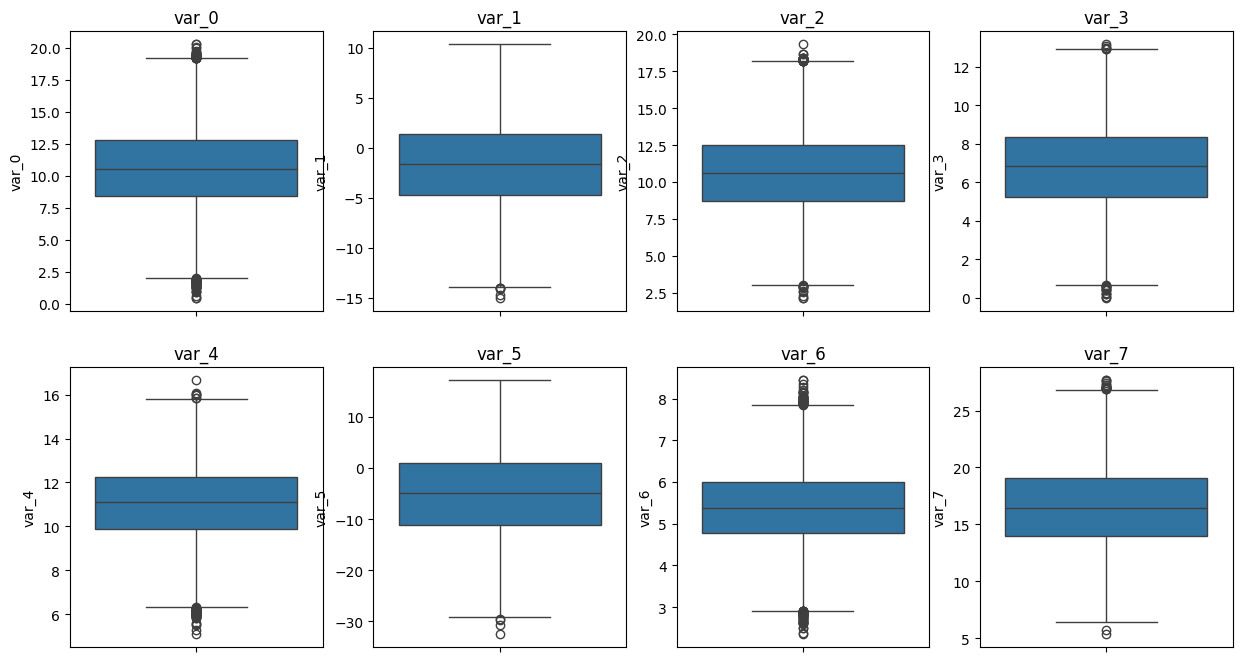

In [25]:
plt.figure(figsize = (15,8))
for i in range (1, 9):
    plt.subplot(2, 4, i)
    sns.boxplot(data = X.iloc[:, i])
    plt.title(X.columns[i])

In [26]:
# Outliers removal
X = X[(np.abs(stats.zscore(X)) < 3).all(axis = 1)]
X.shape

(188969, 201)

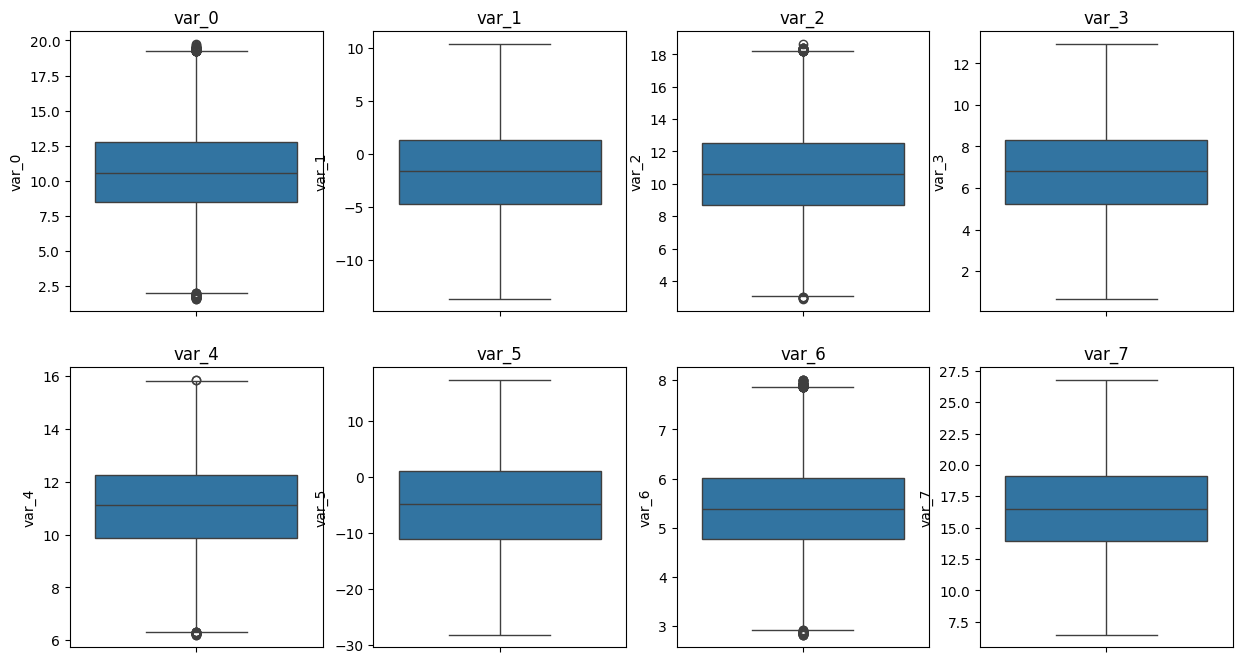

In [27]:
# Outliers removed
plt.figure(figsize = (15,8))
for i in range (1, 9):
    plt.subplot(2, 4, i)
    sns.boxplot(data = X.iloc[:, i])
    plt.title(X.columns[i])

In [28]:
# Null Check
X.isnull().sum().any()


False

In [29]:
y = X["target"]
X.drop(columns=["target"], inplace=True)

target
0    170143
1     18826
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution in target column')

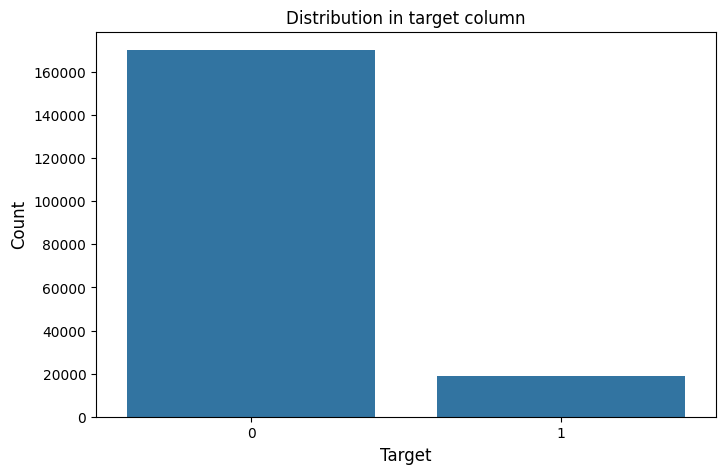

In [30]:
# Target column distribution
print(y.value_counts())
plt.figure(figsize = (8,5))
sns.countplot(x = y)
plt.xlabel("Target", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution in target column", size = 12)

In [31]:
# Resolving highly inbalanced target
# Apply SMOTE for minority over sampling - uses KNN generates synthetic samples by interpolating between the minority class instance and its selected neighbors
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


target
0    170143
1    170143
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution in target column')

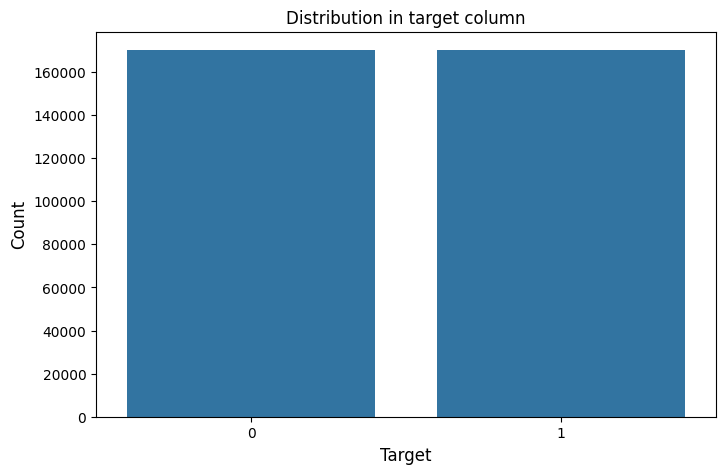

In [32]:
# Target column distribution
print(y_resampled.value_counts())
plt.figure(figsize = (8,5))
sns.countplot(x = y_resampled)
plt.xlabel("Target", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution in target column", size = 12)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Random Forest model prediction

In [38]:
# Model Selection and Training
model = RandomForestClassifier(n_estimators = 10)  # Example: RandomForestClassifier
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [39]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.906271121690323
Precision: 0.9346776216758655
Recall: 0.8740212896982493
F1 Score: 0.9033323735774145
ROC AUC Score: 0.9063395019330838


### Explanation
Accuracy: An accuracy of 0.9063 indicates that the model correctly classifies about 90.63% of instances in the dataset, which is relatively high.

Precision: A precision score of 0.9347 suggests that when the model predicts a positive class, it is correct approximately 93.47% of the time. This indicates a relatively low rate of false positives.

Recall: A recall score of 0.8740 indicates that the model correctly identifies approximately 87.40% of all actual positive instances in the dataset. This indicates a relatively low rate of false negatives.

F1 Score: The F1 score, which is the harmonic mean of precision and recall, is 0.9033. This suggests a good balance between precision and recall.

ROC AUC Score: The ROC AUC score of 0.9063 indicates that the model's ability to distinguish between positive and negative samples is relatively high. The closer the ROC AUC score is to 1.0, the better the model's performance.

Overall, these evaluation metrics suggest that the model is performing reasonably well. 

In [41]:
import pickle
# Save the model to a file
with open("/Users/cars24/Desktop/uber_mlops_task/transaction-predictor/models/randomforest_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [42]:
df_test = pd.read_csv("/Users/cars24/Desktop/uber_mlops_task/santander-customer-transaction-prediction/test.csv")

In [48]:
df_test.loc[:50].to_csv("/Users/cars24/Desktop/uber_mlops_task/santander-customer-transaction-prediction/sample_test.csv", index=False)